#### 1. Nạp các thư viện cần thiết


In [1]:
import pandas as pd   # Thư viện dùng để xử lý dữ liệu (đọc file, phân tích)
import seaborn as sns  # Thư viện để trực quan hóa dữ liệu
import matplotlib.pyplot as plt  # Thư viện để vẽ biểu đồ


#### 2. Đọc dữ liệu và vẽ biểu đồ mối quan hệ


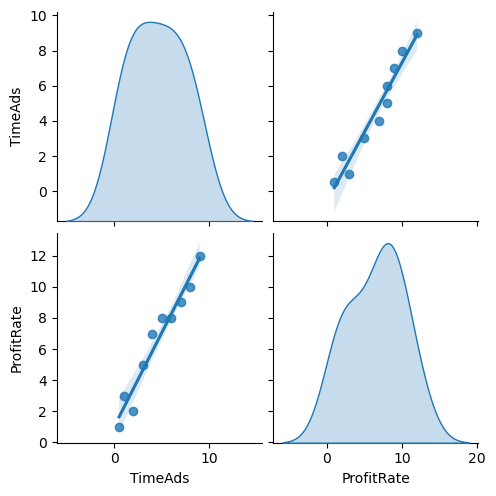

In [2]:
df = pd.read_excel('data_slr.xlsx', sheet_name="data")

sns.pairplot(df[['TimeAds', 'ProfitRate']], diag_kind='kde', kind='reg')
plt.show()


#### 3. Tách biến đầu vào và biến mục tiêu


In [3]:
X = df[['TimeAds']].values  # explanatory = feature (biến đầu vào)
y = df[['ProfitRate']].values  # reponse = target (biến mục tiêu)


#### 4. Chuyển đổi kiểu dữ liệu


In [4]:
X = X.astype(float)
y = y.astype(float)


#### 5. Chia tập dữ liệu thành huấn luyện và kiểm thử


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=16)


##### 6. Khai báo mô hình hồi quy tuyến tính đơn biến


In [6]:
from sklearn import linear_model

model = linear_model.LinearRegression()


#### 7. Huấn luyện mô hình


In [7]:
model.fit(X_train, y_train)


LinearRegression()

#### 8. Dự đoán và đánh giá mô hình


In [8]:
y_test_pred = model.predict(X_test)


#### 9. Tính toán các chỉ số đánh giá mô hình


In [9]:
import numpy as np
from sklearn import metrics

print('Score or R-Squared:', model.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))


Score or R-Squared: 0.9643356772543376
Mean Absolute Error: 0.6710526315789472
Root Mean Squared Error: 0.7598132826197573
Mean Absolute Percentage Error: 0.2563321181742236


#### 10. Vẽ biểu đồ dự đoán so với giá trị thực tế


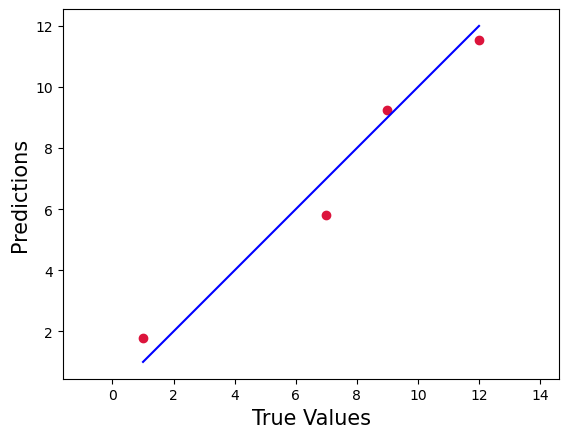

In [10]:
plt.scatter(y_test, y_test_pred, c='crimson')

p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


#### 11. Vẽ biểu đồ Residual


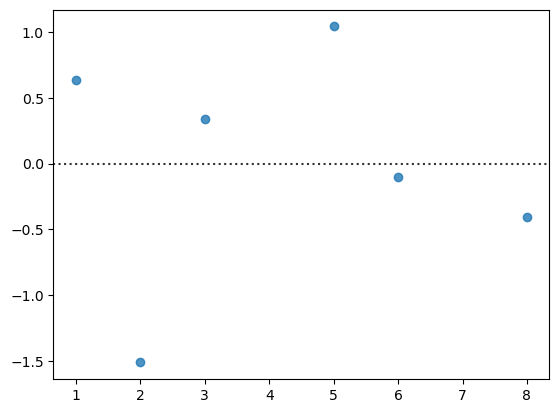

In [11]:
sns.residplot(x=X_train, y=y_train)
plt.show()


#### 12. Lưu trữ mô hình đã huấn luyện


In [12]:
import pickle
pickle.dump(model, open('model_linear_regression.sav', 'wb'))


#### 13. Tải mô hình đã lưu trữ


In [13]:
import pickle
loaded_model = pickle.load(open('model_linear_regression.sav', 'rb'))


#### 14. Dự đoán giá trị mới


In [14]:
vTimeAds = float(input('Nhập thời lượng quảng cáo: '))

predicted_ProfitRate = loaded_model.predict([[vTimeAds]])

print(f'Dự báo điểm ProfitRate là: {predicted_ProfitRate}')


Dự báo điểm ProfitRate là: [[3.51196172]]
